In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
STOCKS = ["MSFT", "GOOGL", "AMZN", "NVDA", "TSLA"]
stock_data = yf.download(STOCKS, start='2020-01-01', end='2023-10-01')
prices = stock_data["Close"]

[*********************100%***********************]  5 of 5 completed


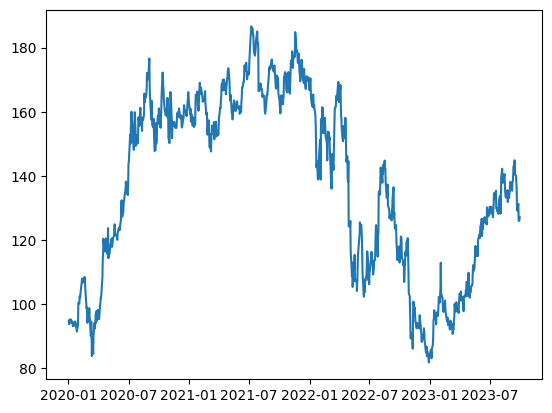

In [3]:
plt.plot(prices["AMZN"])
plt.show()

In [9]:
means = {ticker: prices[ticker].pct_change().mean() + 1 for ticker in STOCKS}
stds = {ticker: prices[ticker].pct_change().std() for ticker in STOCKS}
dt = 1
n = 10
new_prices = {ticker + str(i): [] for i in range(n) for ticker in STOCKS}
indicies = []
prev_index = prices.index[-1]
prev_prices = {ticker + str(i): prices[ticker].iloc[-1] for i in range(n) for ticker in STOCKS}
for t in range(1000):  # 1000 days ahead
    for i in range(n):  # 2 predictions
        for ticker in STOCKS:  # for every chosen stock
            current_price = prev_prices[ticker + str(i)]
            predicted_return = means[ticker] * dt + stds[ticker] * np.random.normal() * np.sqrt(dt)
            new_price = current_price * predicted_return
            new_prices[ticker + str(i)].append(new_price)
            prev_prices[ticker + str(i)] = new_price
    new_index = prev_index + pd.Timedelta(days=dt)
    prev_index = new_index
    indicies.append(new_index)
new_prices = pd.DataFrame(new_prices, index=indicies)
print(new_prices)

                                MSFT0      GOOGL0       AMZN0        NVDA0  \
2023-09-30 00:00:00+00:00  321.585908  131.391828  123.176498    46.192558   
2023-10-01 00:00:00+00:00  316.528114  132.808183  121.842141    43.415087   
2023-10-02 00:00:00+00:00  318.776248  132.459075  127.925205    41.951105   
2023-10-03 00:00:00+00:00  320.466243  135.480773  127.370490    43.138873   
2023-10-04 00:00:00+00:00  317.607242  137.078847  123.901657    44.370415   
...                               ...         ...         ...          ...   
2026-06-21 00:00:00+00:00  662.177216  361.592010   88.609937  2315.792870   
2026-06-22 00:00:00+00:00  666.903892  358.936597   89.445746  2185.332967   
2026-06-23 00:00:00+00:00  670.969012  370.700695   86.800823  1969.512089   
2026-06-24 00:00:00+00:00  650.876368  377.469789   82.884545  1889.845256   
2026-06-25 00:00:00+00:00  658.946977  364.566596   83.110964  1899.967255   

                                 TSLA0        MSFT1      GOOGL1

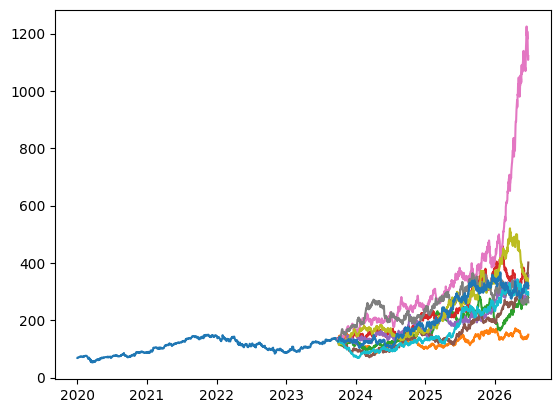

In [5]:
ticker = "GOOGL"

plt.plot(prices[ticker])
for i in range(n):
    plt.plot(new_prices[f"{ticker}{i}"])
plt.show()

In [6]:
stock = yf.Ticker("AMZN")
esg_data = stock.sustainability
print(esg_data)
print(esg_data.loc["peerEnvironmentPerformance"].values[0]["avg"])

                                                                           esgScores
adult                                                                          False
alcoholic                                                                      False
animalTesting                                                                  False
catholic                                                                       False
coal                                                                           False
controversialWeapons                                                           False
environmentPercentile                                                           None
environmentScore                                                                 6.0
esgPerformance                                                              OUT_PERF
furLeather                                                                     False
gambling                                                         